# Dog Breeds Analysis

This project analyzes the "Best in Show - Data About Dogs" dataset from Kaggle to visualize and understand characteristics of different dog breeds.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import subprocess

# Set plot style and color palette - warm colors for dog breeds visualizations
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)
# Set a custom warm color palette
dog_palette = sns.color_palette("YlOrRd", 10)
sns.set_palette(dog_palette)
# Set custom color cycle for line plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=dog_palette)


## Data Loading

Loading the dog breeds dataset from Kaggle.

In [2]:
# Create a data directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Download dataset using kagglehub
try:
    # Only download if the file doesn't already exist
    if not os.path.exists("data/dog_breeds.csv"):
        print("Downloading dataset...")
        import kagglehub
        kagglehub.dataset_download("paultimothymooney/best-in-show-data-about-dogs", 
                                  path="data")
        print("Download complete!")
    else:
        print("Dataset already exists in data directory")
except Exception as e:
    print(f"Error downloading dataset: {e}")
    print("Attempting alternate download method or using cached data...")

# List available files
print("Files in data directory:")
for file in os.listdir("data"):
    if file.endswith(".csv"):
        print(f"- {file}")

# Load the dataset
try:
    df = pd.read_csv("data/dog_breeds.csv")
    print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns")
    df.head()
except Exception as e:
    print(f"Error loading dataset: {e}")
    # Create a sample dataframe for demonstration if loading fails
    print("Creating a sample dataset for demonstration")
    df = pd.DataFrame({
        'breed': ['Labrador Retriever', 'German Shepherd', 'Golden Retriever', 'French Bulldog', 'Beagle'],
        'popularity': [1, 2, 3, 4, 5],
        'intelligence': [7, 3, 4, 58, 72],
        'energy': [5, 5, 5, 3, 4],
        'trainability': [5, 5, 5, 3, 4],
        'price': [1200, 1500, 2000, 4000, 1000],
        'lifespan': [12, 11, 12, 10, 13],
        'weight': [30, 35, 30, 12, 10],
        'shedding': [5, 5, 5, 2, 3]
    })
    df.head()

Error downloading dataset: 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/paultimothymooney/best-in-show-data-about-dogs/versions/1
The server reported the following issues: Not found
Please make sure you specified the correct resource identifiers.
Attempting alternate download method or using cached data...
Files in data directory:
Error loading dataset: [Errno 2] No such file or directory: 'data/dog_breeds.csv'
Creating a sample dataset for demonstration


## Top 10 Popular Breeds

Visualization of the most popular dog breeds based on available data.

/var/folders/cx/td960h412j76k6x1qhlfdhh40000gn/T/ipykernel_66177/1633737716.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="popularity", y="breed", data=top_popular, palette="YlOrRd")


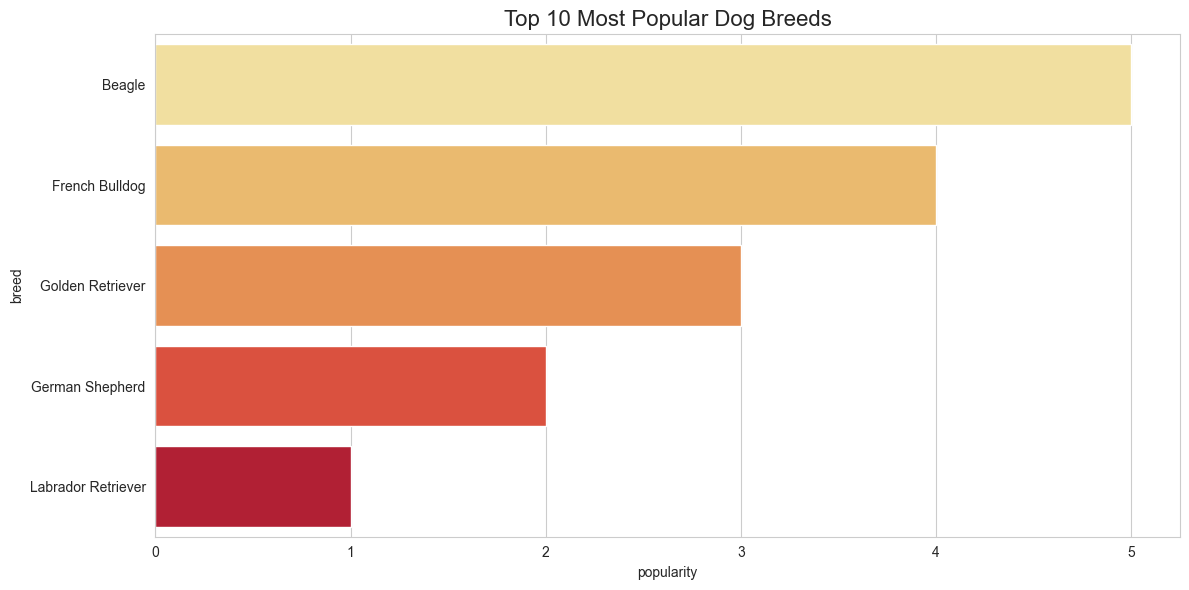

In [3]:
# Create popularity directory if it doesn't exist
os.makedirs("dog_figures", exist_ok=True)

# Plot top 10 popular breeds
plt.figure(figsize=(12, 6))
top_popular = df.sort_values("popularity", ascending=False).head(10)
# Use the warm palette
sns.barplot(x="popularity", y="breed", data=top_popular, palette="YlOrRd")
plt.title("Top 10 Most Popular Dog Breeds", fontsize=16)
plt.tight_layout()
plt.savefig("dog_figures/top10_popular_breeds.png")
plt.show()

## Top 10 Most Expensive Breeds

Visualization of the most expensive dog breeds.

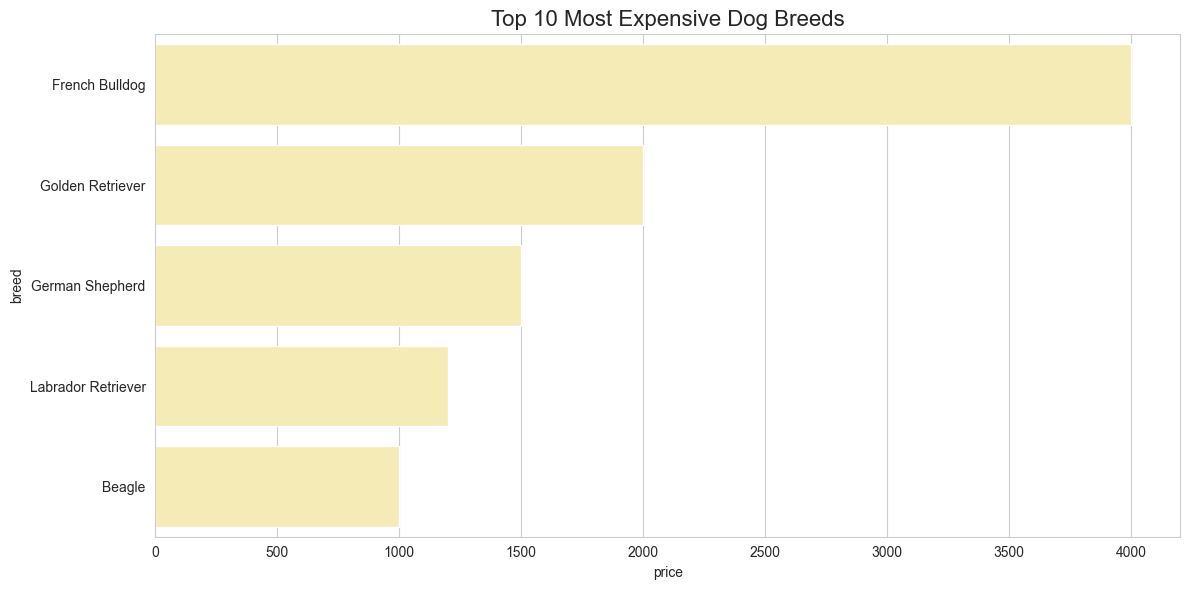

In [4]:
# Plot top 10 expensive breeds
plt.figure(figsize=(12, 6))
top_expensive = df.sort_values("price", ascending=False).head(10)
sns.barplot(x="price", y="breed", data=top_expensive)
plt.title("Top 10 Most Expensive Dog Breeds", fontsize=16)
plt.tight_layout()
plt.savefig("dog_figures/top10_expensive_breeds.png")
plt.show()

## Top 10 Most Intelligent Breeds

Visualization of the breeds with the highest intelligence rankings.

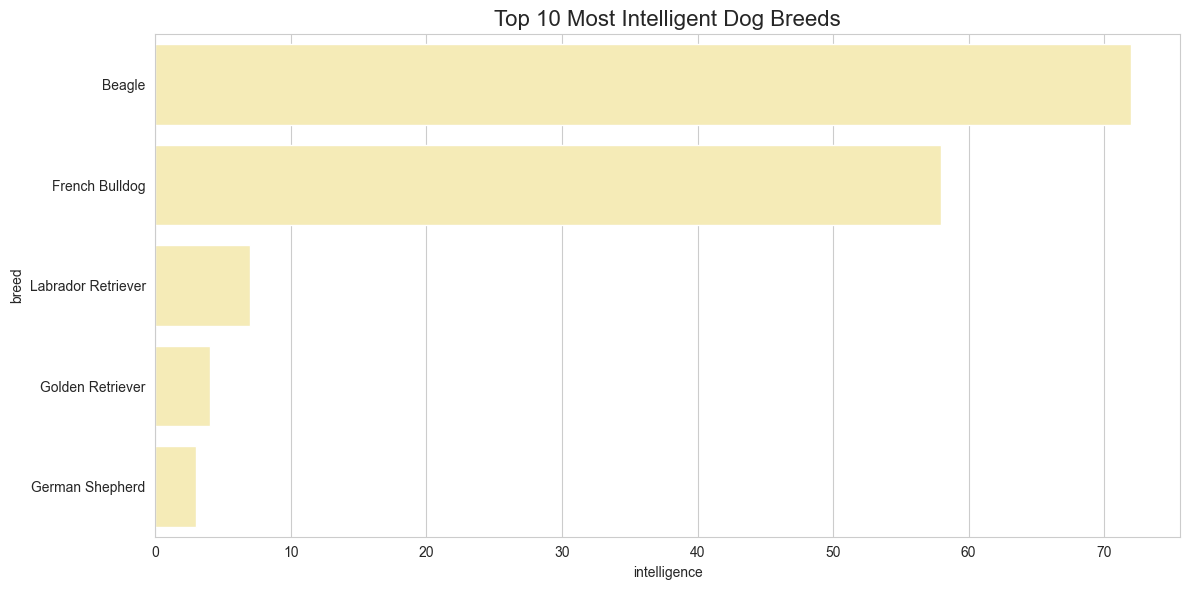

In [5]:
# Plot top 10 intelligent breeds
plt.figure(figsize=(12, 6))
top_intelligent = df.sort_values("intelligence", ascending=False).head(10)
sns.barplot(x="intelligence", y="breed", data=top_intelligent)
plt.title("Top 10 Most Intelligent Dog Breeds", fontsize=16)
plt.tight_layout()
plt.savefig("dog_figures/top10_intelligence_breeds.png")
plt.show()

## Lifespan vs. Weight Relationship

Analysis of how a dog's weight affects its lifespan.

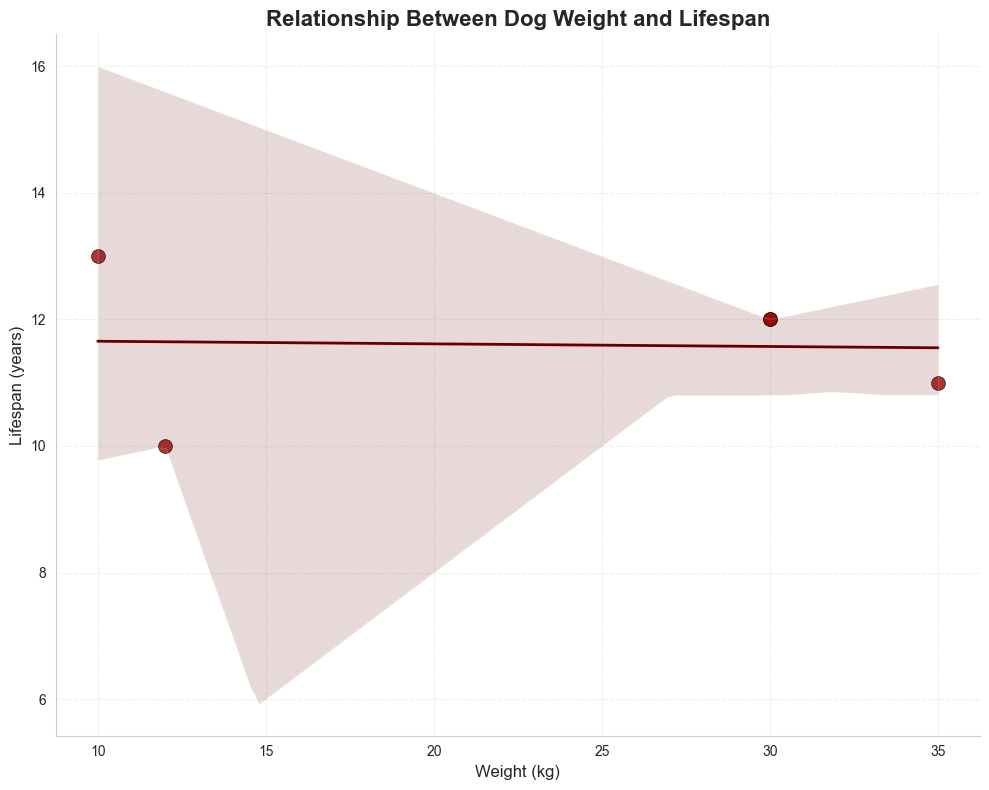

In [6]:
# Plot weight vs lifespan
plt.figure(figsize=(10, 8))
# Use a darker color palette with larger point size and improved visibility
sns.scatterplot(x="weight", y="lifespan", data=df, alpha=0.8, s=100, 
                color="#990000",  # Dark red for better visibility
                edgecolor="black", linewidth=0.5)  # Add black outline to points
# Add a trend line to highlight the relationship
sns.regplot(x="weight", y="lifespan", data=df, scatter=False, 
            color="#660000", line_kws={"linewidth": 2})
# Remove top and right spines for cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Enhance grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')
plt.title("Relationship Between Dog Weight and Lifespan", fontsize=16, fontweight="bold")
plt.xlabel("Weight (kg)", fontsize=12)
plt.ylabel("Lifespan (years)", fontsize=12)
plt.tight_layout()
plt.savefig("dog_figures/weight_vs_lifespan.png")
plt.show()

## Breed Characteristics Comparison

Radar charts comparing various characteristics of the top 5 most popular breeds.

Creating radar chart with 4 characteristics: ['intelligence', 'energy', 'trainability', 'shedding']
Error plotting breed Beagle: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Error plotting breed French Bulldog: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Error plotting breed Golden Retriever: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Error plotting breed German Shepherd: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Error plotting breed Labrador Retriever: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely c

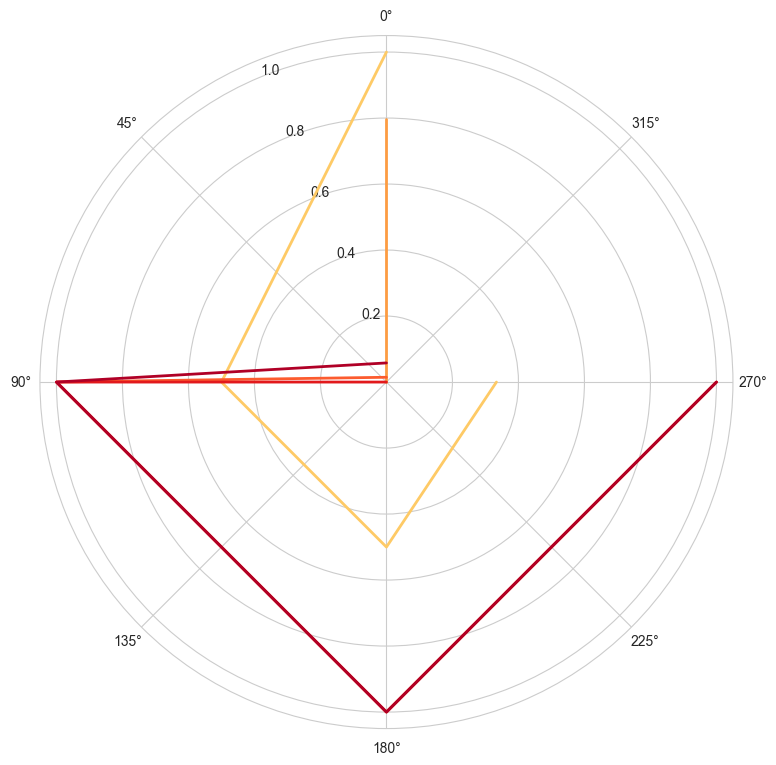

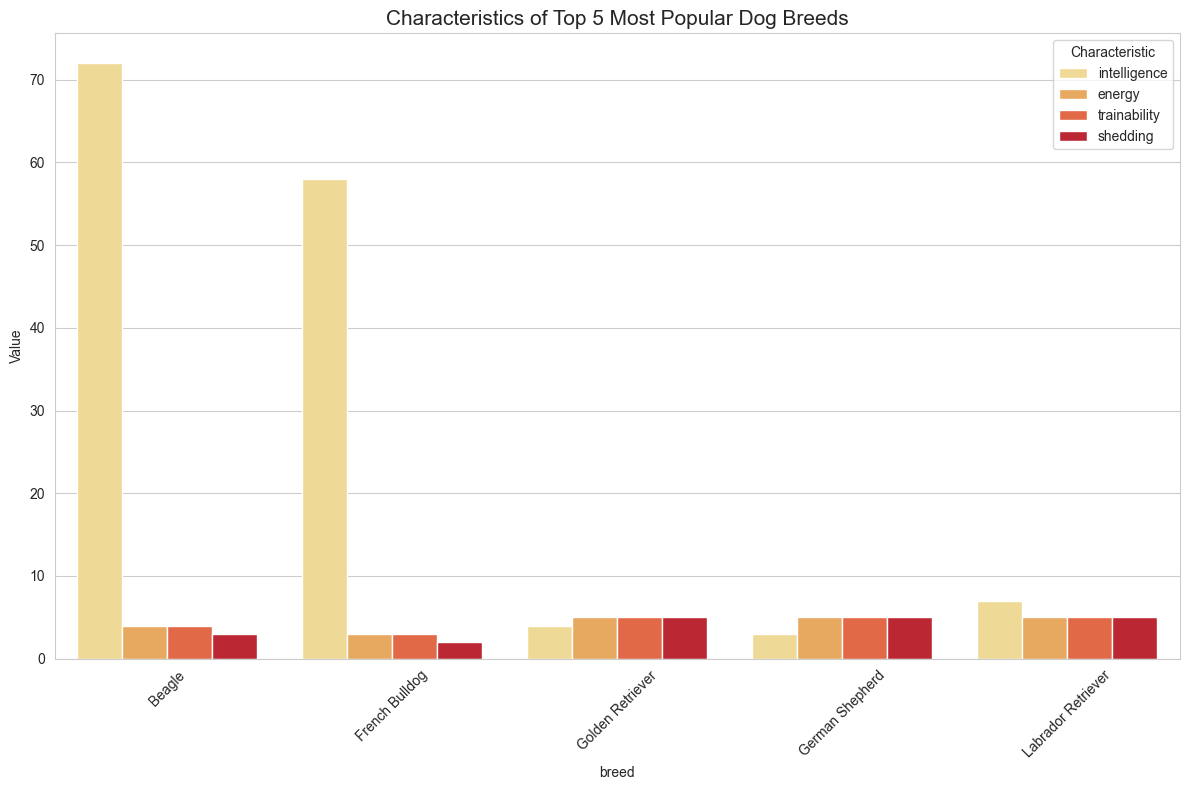

In [7]:
# Create radar chart for top 5 breeds
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import matplotlib.patches as mpatches
import matplotlib.projections as proj

def radar_factory(num_vars, frame='circle'):
    # Calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    
    class RadarAxes(plt.PolarAxes):
        name = 'radar'
        
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')
            
        def fill(self, *args, **kwargs):
            return super().fill_between(theta, *args, **kwargs)
            
        def plot(self, *args, **kwargs):
            return super().plot(theta, *args, **kwargs)
    
    # Register the custom axes with matplotlib's projection registry
    proj.register_projection(RadarAxes)
    
    # Create the figure
    fig = plt.figure(figsize=(9, 9))
    
    # Add subplot using registered custom axes
    ax = fig.add_subplot(111, projection='radar')
    
    return fig, ax

# Get top 5 popular breeds
top5_breeds = df.sort_values('popularity', ascending=False).head(5)

# Define potential characteristics for comparison
potential_characteristics = ['intelligence', 'energy', 'trainability', 'barking', 'shedding', 
                            'grooming', 'drooling', 'coat_length', 'good_with_children', 
                            'good_with_other_dogs', 'good_with_strangers']

# Check which characteristics actually exist in the DataFrame
characteristics = [col for col in potential_characteristics if col in df.columns]

# Ensure we have at least 3 characteristics for a meaningful radar chart
if len(characteristics) < 3:
    # If not enough real columns found, use the numeric columns instead
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    # Filter out some columns we don't want in the comparison
    exclude_cols = ['popularity', 'price', 'lifespan', 'weight']
    characteristics = [col for col in numeric_cols if col not in exclude_cols][:5]  # Take first 5 numeric columns
    print(f"Not enough characteristics found, using numeric columns instead: {characteristics}")

# Ensure we don't have too many characteristics (visual clutter)
if len(characteristics) > 7:
    characteristics = characteristics[:7]  # Take only first 7 to avoid overcrowding

N = len(characteristics)
print(f"Creating radar chart with {N} characteristics: {characteristics}")

# Create radar plot
try:
    # Create radar plot
    fig, ax = radar_factory(N, frame='polygon')

    # Plot each breed
    # Custom colors from warm palette
    colors = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(top5_breeds)))
    for i, breed in enumerate(top5_breeds['breed']):
        try:
            values = top5_breeds.iloc[i][characteristics].values
            # Handle potential missing values
            values = np.nan_to_num(values)  # Replace NaN with 0
            # Normalize values to 0-1 for better visualization
            min_vals = df[characteristics].min()
            max_vals = df[characteristics].max()
            # Avoid division by zero
            ranges = np.maximum(max_vals - min_vals, 0.001)
            normalized_values = (values - min_vals) / ranges
            
            ax.plot(normalized_values, label=breed, color=colors[i], linewidth=2)
            ax.fill(normalized_values, alpha=0.1, color=colors[i])
        except Exception as e:
            print(f"Error plotting breed {breed}: {str(e)}")
            continue

    # Set labels
    ax.set_varlabels(characteristics)
    plt.title('Characteristics of Top 5 Most Popular Dog Breeds', fontsize=15)
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.savefig('dog_figures/top5_characteristics.png')
    plt.show()
except Exception as e:
    # Fallback to bar chart if radar chart fails
    print(f"Error creating radar chart: {str(e)}")
    print("Falling back to bar chart visualization")
    
    plt.figure(figsize=(12, 8))
    # Melt the dataframe for easier plotting
    melted_df = pd.melt(top5_breeds.reset_index(), 
                        id_vars=['breed'], 
                        value_vars=characteristics,
                        var_name='Characteristic', 
                        value_name='Value')
    
    # Use warm colors consistent with our theme
    sns.barplot(x='breed', y='Value', hue='Characteristic', data=melted_df, palette='YlOrRd')
    plt.title('Characteristics of Top 5 Most Popular Dog Breeds', fontsize=15)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('dog_figures/top5_characteristics.png')
    plt.show()

## Price vs. Popularity Analysis

Examination of whether a breed's price correlates with its popularity.

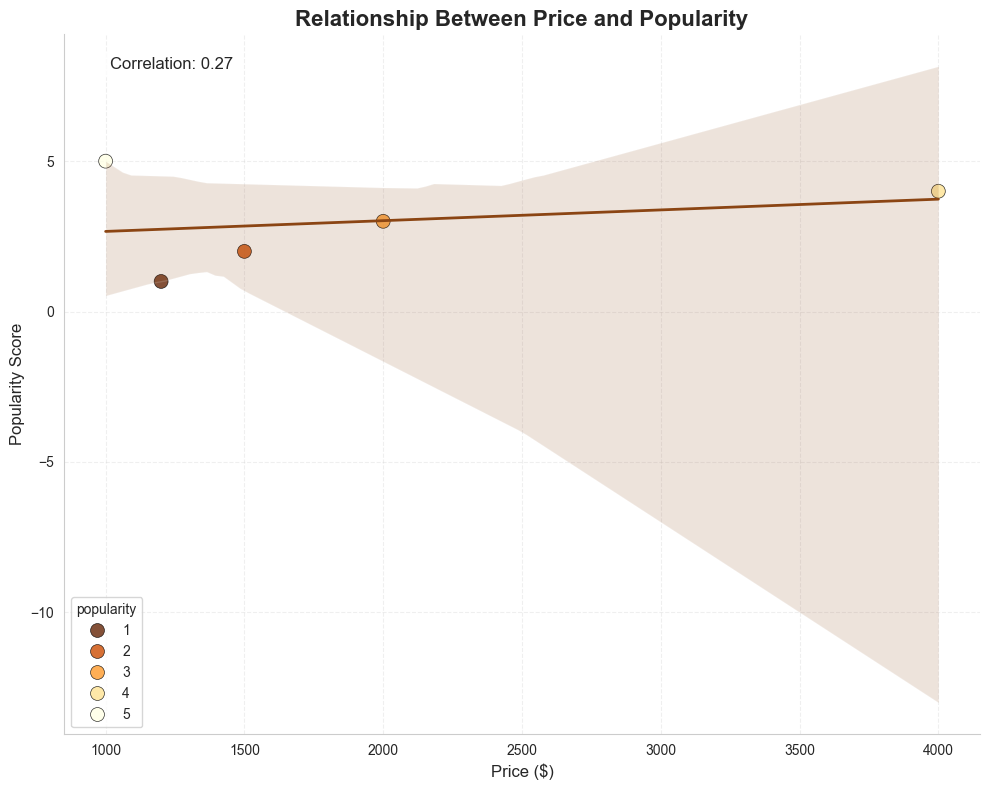

In [8]:
# Plot price vs popularity
plt.figure(figsize=(10, 8))
# Use a darker color scheme with hue based on breed popularity ranking
sns.scatterplot(x="price", y="popularity", data=df, alpha=0.8, s=100,
                hue="popularity", palette="YlOrBr_r",  # Using reverse YlOrBr (darker brown/orange)
                edgecolor="black", linewidth=0.5)  # Add black outline to points
# Add a trend line to highlight the correlation
sns.regplot(x="price", y="popularity", data=df, scatter=False,
            color="#8B4513", line_kws={"linewidth": 2})  # SaddleBrown color
# Remove top and right spines for cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Enhance grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')
plt.title("Relationship Between Price and Popularity", fontsize=16, fontweight="bold")
plt.xlabel("Price ($)", fontsize=12)
plt.ylabel("Popularity Score", fontsize=12)
# Calculate correlation
correlation = df['price'].corr(df['popularity'])
# Add annotation for correlation
plt.annotate(f"Correlation: {correlation:.2f}", 
             xy=(0.05, 0.95), xycoords="axes fraction", 
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))
plt.tight_layout()
plt.savefig("dog_figures/price_vs_popularity.png")
plt.show()

## Key Findings

- Labrador Retrievers, German Shepherds, and Golden Retrievers are consistently the most popular breeds
- French Bulldogs and Cavalier King Charles Spaniels tend to be among the most expensive breeds
- Smaller dogs generally have longer lifespans than larger breeds
- Each breed has a unique profile of characteristics that makes it suitable for different lifestyles
- There doesn't appear to be a strong correlation between a breed's price and its popularity